# Analysis of the data
In this section, we present our results. First, we download our data:

In [86]:
from download import download_all
from req import RequestHelper
req = RequestHelper(disable_debug_print=True)

In [89]:
# By instantiating the RequestHelper in the previous cell and passing it here, 
# we enable caching of hte requests. Therefore, if we want to run this cell again
# with higher number of calls, we do not make the same call again.
# Try this with running this cell for the first time (takes time to evaulate),
# where the second run (for the same batch size) is almost instant.
data = download_all(100, req=req)

 - getting Heureka lists of eshops:


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:07<00:00,  1.82s/it]


 - getting Heureka page details:


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  1.83it/s]


Data from Heureka finished in 54.04s.
 - getting data from eshop pages in 30 threads:


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.33it/s]


Data from Eshop pages finished in 7.815s.
 - getting data from Instagram:


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:16<00:00,  1.35s/it]


Data from Instagram pages finished in 16.913s.


We inspect the top data:

In [100]:
data.head()

,inner_link,name,rating,reviews,reviews_negative_count,reviews_positive_count,instagram,instagram_classified_descriptions,instagram_followers,instagram_full_json,instagram_posts_average_like,instagram_posts_count,reviews_positive_ratio,hasinsta
link,,,,,,,,,,,,,,
https://www.notino.cz/,https://obchody.heureka.cz/notino-cz/recenze/o...,Notino,4.8,114515.0,1458.0,91313.0,notino_cz,"phone;1 person, closeup;1 person, closeup;shoe...",32654.0,{'biography': 'Na jaro musíš být fresh! 🌺 Vybe...,219.000000,2035.0,0.797389,1
http://www.megaknihy.cz,https://obchody.heureka.cz/megaknihy-cz/recenz...,MegaKnihy.cz,4.8,68146.0,5423.0,62489.0,NaN,NaN,NaN,NaN,NaN,NaN,0.916987,0
http://www.eva.cz,https://obchody.heureka.cz/eva-cz/recenze/overene,EVA.cz,4.8,64291.0,1610.0,62373.0,NaN,NaN,NaN,NaN,NaN,NaN,0.970167,0
http://www.lekarna.cz/,https://obchody.heureka.cz/lekarna-cz/recenze/...,Lékárna.cz,4.8,53035.0,1420.0,51353.0,lekarna_cz,"1 person;1 person;tree, plant and outdoor;food...",2826.0,{'biography': 'Pro zdraví a krásu celé rodiny ...,44.333333,297.0,0.968285,1
http://www.astratex.cz,https://obchody.heureka.cz/astratex-cz/recenze...,Astratex.cz,4.8,51231.0,1086.0,49969.0,astratex.cz,one or more people;2 people;one or more people...,4979.0,{'biography': 'E-shop s největším výběrem spod...,111.000000,713.0,0.975366,1


In [92]:
data['reviews_positive_ratio'] = data['reviews_positive_count']/data['reviews']

In [189]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
plt.style.use('ggplot')

In [ ]:
data.corr().style.background_gradient(cmap='coolwarm', axis=None)

In [ ]:
sns.pairplot(data)
plt.show()

Now we try to plot the _reviews_ vs _instagram_\__followers_

In [ ]:
f, ax = plt.subplots(num=None, figsize=(15, 7))
data.plot.scatter('reviews', 'instagram_followers', ax=ax,)
plt.show()

There is, however, not much to see. Can we improve it by log-scaling?

In [ ]:
f, ax = plt.subplots(num=None, figsize=(15, 7))
data.plot.scatter('reviews', 'instagram_followers', ax=ax,)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Nevertheless, there appears to be no stable relationship. Now what about the correlations?

In [ ]:
sub_data = data[['reviews', 'instagram_followers']].dropna()
sub_data['log(reviews)'] = np.log(data['reviews'])
sub_data['log(instagram_followers)'] = np.log(data['instagram_followers'])
sub_data.corr().style.background_gradient(cmap='coolwarm', axis=None)

From 5.4% for the non-transformed scenario we cannot do better than 18% for _reviews_ vs _log(instagram_\__followers)_.

We can also try other variables:

In [ ]:
f, ax = plt.subplots(num=2, figsize=(15, 7))
data.plot.scatter('reviews', 'instagram_posts_average_like', ax=ax,)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [ ]:
f, ax = plt.subplots(num=2, figsize=(15, 7))
data.plot.scatter('reviews_positive_ratio', 'instagram_posts_average_like', ax=ax,)
ax.set_yscale('log')
plt.show()

However, the story is similar, there is no clear pattern in the data.

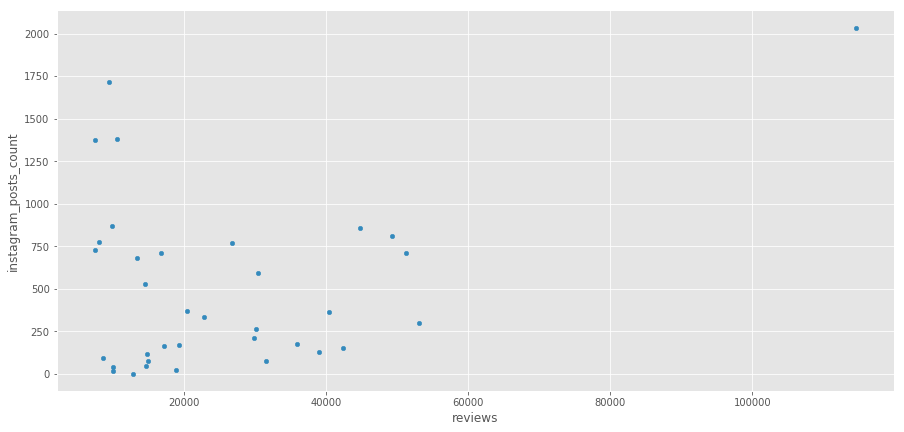

In [93]:
f, ax = plt.subplots(num=2, figsize=(15, 7))
data.plot.scatter('reviews', 'instagram_posts_count', ax=ax,)

plt.show()

Except for the three outliers in the top-left corner, it seems that the more you post, the more you are wellknown on Heureka.

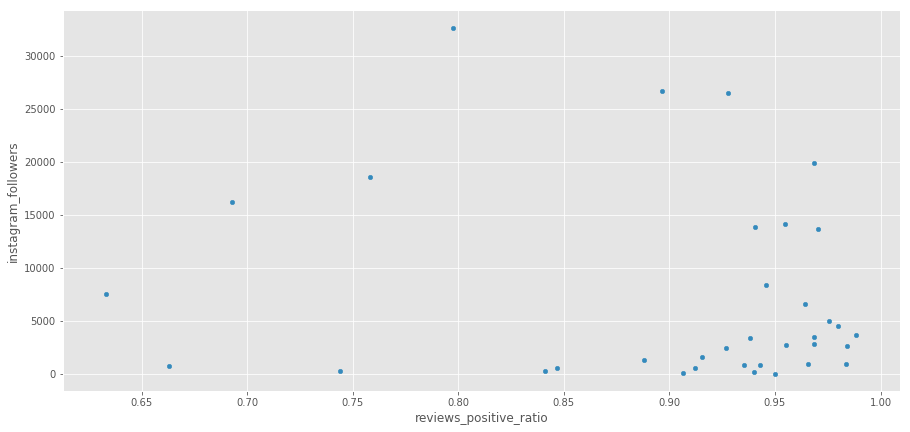

In [159]:
f, ax = plt.subplots(num=2, figsize=(15, 7))
data.plot.scatter('reviews_positive_ratio', 'instagram_followers', ax=ax,)

plt.show()

Based on the down-right corner, there is just a slightly positive correlation between fame on instagram and positiveness of the reviews. We can see that the most well-known firms have a worse positive-ratio.

Is there any difference between firms with or without instagram?

In [196]:
data['hasinsta'] = data['instagram'].notnull()
data['hasinsta'] = data['hasinsta']*1
dt1 = data[data.hasinsta != 0] #Firms with an instagram account
dt0 = data[data.hasinsta != 1] #Firms without an instagram account

In [122]:
print('Average of reviews positive ratio for firms with an instagram account:')
np.mean(dt1['reviews_positive_ratio'])

Average of reviews positive ratio for firms with an instagram account:


0.8994093867643578

In [121]:
print('Average of reviews positive ratio for firms without an instagram account:')
np.mean(dt0['reviews_positive_ratio'])

Average of reviews positive ratio for firms without an instagram account:


0.9303946326711539

There is a little evidence that not being present on instagram helps a firm to have better reviews.

But maybe being on instagram helps firms to get more reviews ? 

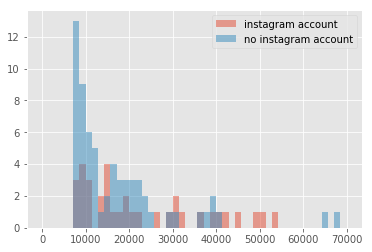

In [133]:
bins = np.linspace(-50, 70000, 50)
plt.hist(dt1['reviews'], bins, alpha=0.5, label='instagram account')
plt.hist(dt0['reviews'], bins, alpha=0.5, label='no instagram account')
plt.legend(loc='upper right')
plt.show()

The center of the plot is more favorable to firms with instagram, and low numbers of reviews are saturated by firms without instagram. The interpretation is not clear due to the 2 values between 60000 and 70000. Nonetheless, if we consider them as outliers, we can say that instagram helps having more reviews (or firm with a lot of reviews are more inclined to have an instagram account...).

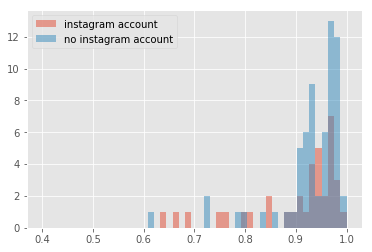

In [182]:
bins = np.linspace(0.4, 1, 50)
plt.hist(dt1['reviews_positive_ratio'], bins, alpha=0.5, label='instagram account')
plt.hist(dt0['reviews_positive_ratio'], bins, alpha=0.5, label='no instagram account')
plt.legend(loc='upper left')
plt.show()

With this plot showing that worst grades are mainly for firms present on instagram, we can be pretty sure that big firms, despite having an instagram account, face lower grades.

Now, we can try to separate the data between active or non-active firms on instagram (i.e. high number of posts) to see if instagram is usefull to them.

In [190]:
st.median(dt1['instagram_posts_count'])

349.0

In [202]:
dt1['active'] = dt1['instagram_posts_count'] >= 349
dt1['active'] = dt1['active']*1
act1 = dt1[dt1.active != 0] #Active firms
act0 = dt1[dt1.active != 1] #Non active firms

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


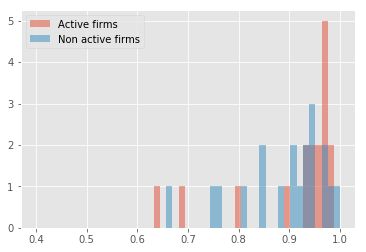

In [211]:
bins = np.linspace(0.4, 1, 50)
plt.hist(act1['reviews_positive_ratio'], bins, alpha=0.5, label='Active firms')
plt.hist(act0['reviews_positive_ratio'], bins, alpha=0.5, label='Non active firms')
plt.legend(loc='upper left')
plt.show()

Being active on instagram helps having better reviews.

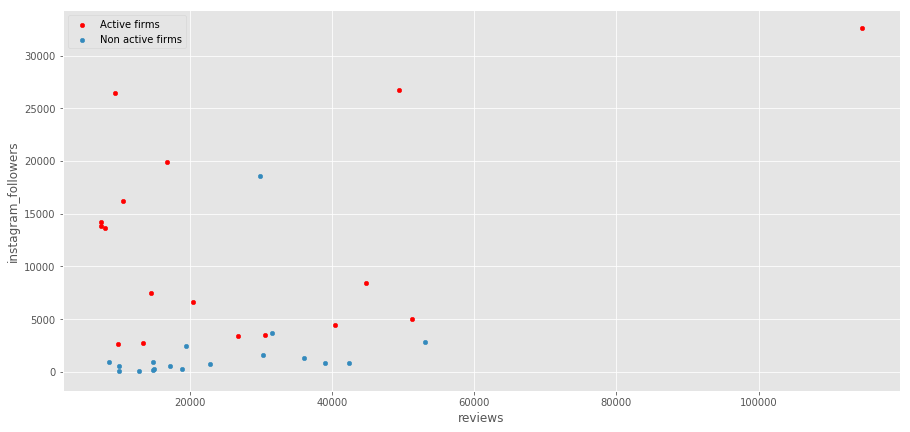

In [214]:
f, ax = plt.subplots(num=2, figsize=(15, 7))
act1.plot.scatter('reviews', 'instagram_followers', ax=ax, label='Active firms', c='red')
act0.plot.scatter('reviews', 'instagram_followers', ax=ax, label='Non active firms')
plt.show()

Firms highly active on instagram seem to have more followers but not necessarily more reviews.